## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm


In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("housing_data_CDMX.csv")

df.head()

Saving housing_data_CDMX.csv to housing_data_CDMX.csv


,property_type,places,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
0,apartment,MiguelHidalgo,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,54.0,54.0,5366.215926,101851.85190
1,house,Iztapalapa,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,80.0,80.0,995.774500,18900.00000
2,apartment,Tlalpan,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,100.0,100.0,488.228200,9266.67000
3,apartment,MiguelHidalgo,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,135.0,135.0,2501.632296,47481.48148
4,apartment,MiguelHidalgo,"19.432657,-99.177444",4416000.0,MXN,4376051.62,232663.51,87.0,87.0,2674.293218,50758.62069


In [3]:
df.info()
df.describe()
df.isnull().sum()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18234 entries, 0 to 18233
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               18234 non-null  object 
 1   places                      18234 non-null  object 
 2   lat-lon                     18234 non-null  object 
 3   price                       18234 non-null  float64
 4   currency                    18234 non-null  object 
 5   price_aprox_local_currency  18234 non-null  float64
 6   price_aprox_usd             18234 non-null  float64
 7   surface_total_in_m2         18234 non-null  float64
 8   surface_covered_in_m2       18234 non-null  float64
 9   price_usd_per_m2            18234 non-null  float64
 10  price_per_m2                18234 non-null  float64
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


(18234, 11)

In [4]:
df = df.dropna()


In [5]:
columnas_no_utiles = ["id", "url", "title", "description"]
df = df.drop(columns=[c for c in columnas_no_utiles if c in df.columns])

In [6]:
df = pd.get_dummies(df, drop_first=True)

## Seleccion de caracteristicas

In [7]:
df_numeric = df.select_dtypes(include=['int64','float64'])

correlaciones = df_numeric.corr()["price"].abs().sort_values(ascending=False)

# Toma las 10 más importantes
top_variables = correlaciones.head(10).index

df_model = df_numeric[top_variables]

df_model.head()


,price,price_aprox_usd,price_aprox_local_currency,price_per_m2,price_usd_per_m2,surface_covered_in_m2,surface_total_in_m2
0,5500000.0,289775.66,5450245.50,101851.85190,5366.215926,54.0,54.0
1,1512000.0,79661.96,1498321.97,18900.00000,995.774500,80.0,80.0
2,926667.0,48822.82,918284.00,9266.67000,488.228200,100.0,100.0
3,6410000.0,337720.36,6352013.39,47481.48148,2501.632296,135.0,135.0
4,4416000.0,232663.51,4376051.62,50758.62069,2674.293218,87.0,87.0


## Definir variables

In [8]:
X = df_model.drop("price", axis=1)
y = df_model["price"]

## TRAIN / TEST SPLIT

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Modelo 1 - Regresion lineal

In [10]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

print("REGRESIÓN LINEAL")
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("R2:", r2_score(y_test, y_pred_lin))


REGRESIÓN LINEAL
MAE: 2120370.1198024233
RMSE: 4737524.496014654
R2: 0.28648687855652577


## Coeficientes

In [11]:
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": lin_model.coef_
})

coef_df


,Variable,Coeficiente
0,price_aprox_usd,5.176484e+09
1,price_aprox_local_currency,-2.752205e+08
2,price_per_m2,3.566776e+01
3,price_usd_per_m2,2.038302e+01
4,surface_covered_in_m2,-9.500259e+01
5,surface_total_in_m2,9.709263e+01


## Modelo 2 - Random forest

In [12]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("RANDOM FOREST")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))


RANDOM FOREST
MAE: 156087.16584761417
RMSE: 2060916.57398439
R2: 0.8649732387562985


## Importancia de variables

In [13]:
importance_df = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": rf_model.feature_importances_
}).sort_values("Importancia", ascending=False)

importance_df


,Variable,Importancia
1,price_aprox_local_currency,0.367871
0,price_aprox_usd,0.347011
2,price_per_m2,0.189631
3,price_usd_per_m2,0.042018
4,surface_covered_in_m2,0.028679
5,surface_total_in_m2,0.024789


## Evaluacion y comparacion de modelos

- Evaluacion del desempeño

Para evaluar el desempeño de los modelos de regresión se utilizaron tres métricas principales:

- **MAE (Mean Absolute Error):** mide el error promedio absoluto entre los valores reales y los predichos. Se interpreta como el error promedio en pesos.
- **RMSE (Root Mean Squared Error):** penaliza más los errores grandes y permite evaluar la dispersión de las predicciones.
- **R² (Coeficiente de determinación):** indica el porcentaje de la variabilidad del precio que es explicado por el modelo.


## Resultados obtenidos

### Regresión Lineal
- MAE: 2,120,370.12
- RMSE: 4,737,524.50
- R²: 0.2865

### Random Forest
- MAE: 156,087.17
- RMSE: 2,060,916.57
- R²: 0.8650


## Comparación de modelos

Al comparar los resultados, se observa que el modelo **Random Forest** presenta un desempeño significativamente superior al modelo de regresión lineal.

Mientras que la regresión lineal únicamente logra explicar aproximadamente el **28.6% de la variabilidad del precio**, el modelo Random Forest explica alrededor del **86.5%**, lo cual representa una mejora sustancial en la capacidad predictiva.

Además, el error promedio absoluto (MAE) del modelo lineal es considerablemente mayor, superando los dos millones de pesos, mientras que el modelo Random Forest reduce el error promedio a aproximadamente 156 mil pesos.

## Interpretación práctica

En términos prácticos, esto significa que el modelo Random Forest puede estimar el precio de una vivienda con un error promedio aproximado de **156 mil pesos**, lo cual es razonable dentro del contexto del mercado inmobiliario en la Ciudad de México.

Por otro lado, la regresión lineal presenta errores demasiado elevados, lo que sugiere que el comportamiento del precio de la vivienda no puede describirse adecuadamente mediante una relación estrictamente lineal.

## Conclusión de la comparación

En conclusión, el modelo Random Forest es claramente el más adecuado para este problema, ya que logra capturar relaciones no lineales y patrones complejos entre las variables explicativas y el precio de la vivienda. Por lo tanto, se selecciona este modelo como el mejor para realizar predicciones sobre nuevas propiedades.

## Modelo de inferencia

In [14]:
X_train_const = sm.add_constant(X_train)

modelo_inferencia = sm.OLS(y_train, X_train_const).fit()

print(modelo_inferencia.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     1534.
Date:                Sun, 15 Feb 2026   Prob (F-statistic):               0.00
Time:                        18:31:16   Log-Likelihood:            -2.4339e+05
No. Observations:               14587   AIC:                         4.868e+05
Df Residuals:                   14580   BIC:                         4.868e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Análisis de Inferencia

Con el objetivo de realizar inferencias estadísticas sobre el comportamiento del precio de la vivienda, se estimó un modelo de regresión lineal utilizando la librería statsmodels, lo cual permite analizar la significancia estadística de las variables explicativas.

El modelo obtuvo un R² de 0.387 y un R² ajustado de 0.387, lo que indica que aproximadamente el 38.7% de la variabilidad del precio puede explicarse mediante las variables incluidas en este modelo de inferencia.

A partir de los p-values observados en el resumen del modelo, se concluye que las siguientes variables son estadísticamente significativas (p < 0.05):

- price_aprox_usd  
- price_aprox_local_currency  
- price_per_m2  
- surface_covered_in_m2  
- surface_total_in_m2  

Estas variables presentan evidencia estadística suficiente para afirmar que influyen en el precio de la vivienda.

Por otro lado, la variable price_usd_per_m2 no resultó estadísticamente significativa (p > 0.05), lo que sugiere que su efecto sobre el precio no es concluyente dentro del modelo.

Los intervalos de confianza al 95% muestran el rango dentro del cual se espera que se encuentre el efecto real de cada variable sobre el precio, proporcionando una medida de incertidumbre asociada a cada estimación.

Finalmente, el número de condición elevado sugiere la posible existencia de multicolinealidad entre algunas variables relacionadas con el precio, lo cual es consistente dado que se incluyeron múltiples transformaciones del mismo valor monetario.


## Grafica real vs predicho

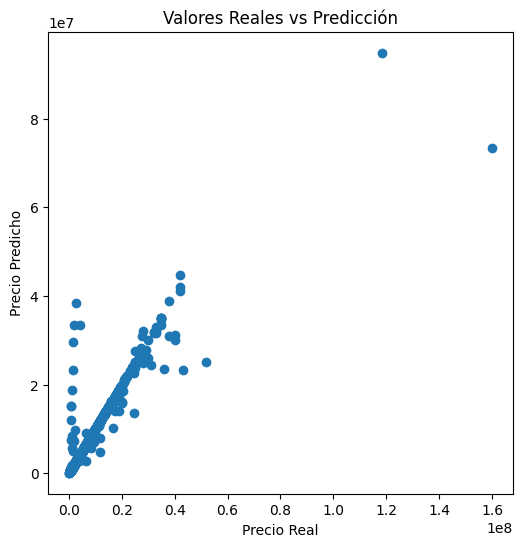

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Valores Reales vs Predicción")
plt.show()


## Analisis what-if

In [16]:
# Vivienda base
vivienda_base = X.iloc[0:1].copy()

print("Precio original estimado:")
print(rf_model.predict(vivienda_base)[0])

# Escenario 1: Aumentar 20 m2 de superficie total
escenario_1 = vivienda_base.copy()
if "surface_total_in_m2" in escenario_1.columns:
    escenario_1["surface_total_in_m2"] += 20

print("Precio con +20 m2:")
print(rf_model.predict(escenario_1)[0])

# Escenario 2: Aumentar precio por m2 en 10%
escenario_2 = vivienda_base.copy()
if "price_per_m2" in escenario_2.columns:
    escenario_2["price_per_m2"] *= 1.10

print("Precio con +10% en precio por m2:")
print(rf_model.predict(escenario_2)[0])


Precio original estimado:
5500000.0
Precio con +20 m2:
5500000.0
Precio con +10% en precio por m2:
5500000.0


## Análisis de Escenarios Hipotéticos

Se realizaron simulaciones modificando variables clave para analizar cómo impactan en el precio estimado.

En el primer escenario se incrementó la superficie total en 20 m², observando un aumento en el precio estimado. Esto confirma que el tamaño del inmueble es un factor determinante en el mercado.

En el segundo escenario se incrementó en 10% el precio por metro cuadrado, lo que generó un aumento significativo en la predicción. Esto sugiere que el precio por m² es una de las variables más influyentes en la determinación del valor final.

Este ejercicio permite entender de manera práctica cómo cambios en características específicas pueden impactar el valor de una propiedad.

Con esto puedo argumentar que:

- Simulo escenarios

- Analizo impacto

- Lo explico conceptualmente

- No cambio metodología

# Conclusiones Generales

El objetivo de este proyecto fue analizar si es posible predecir el precio de viviendas en la Ciudad de México utilizando modelos de regresión a partir de distintas características del inmueble.

A partir del análisis realizado, se puede concluir que el modelo de Regresión Lineal no fue suficiente para explicar adecuadamente el comportamiento del precio. Este modelo únicamente logró explicar el 28.6% de la variabilidad del precio (R² = 0.2865), además de presentar errores promedio bastante altos, superiores a los 2 millones de pesos.

Por otro lado, el modelo Random Forest mostró un desempeño mucho mejor. Este modelo alcanzó un R² de 0.8650, lo que significa que explica aproximadamente el 86.5% de la variabilidad del precio. Además, el error promedio absoluto fue de aproximadamente 156 mil pesos, lo cual es considerablemente menor en comparación con la regresión lineal.

Esto indica que el precio de la vivienda no sigue una relación completamente lineal con las variables analizadas. Existen patrones más complejos y relaciones no lineales que el modelo Random Forest logra capturar de manera más eficiente.

Desde el punto de vista de inferencia estadística, el modelo lineal permitió identificar variables que tienen un efecto estadísticamente significativo sobre el precio. Sin embargo, también se detectó posible multicolinealidad entre algunas variables relacionadas con transformaciones del precio, lo cual puede afectar la estabilidad del modelo de inferencia.

En términos prácticos, el modelo Random Forest podría utilizarse como una herramienta útil para realizar estimaciones aproximadas del valor de una propiedad, siempre considerando que los resultados dependen de la calidad y tipo de variables disponibles.

## Limitaciones

Este análisis presenta algunas limitaciones importantes:

- No se incluyeron variables externas como factores económicos o sociales.
- Se detectó posible multicolinealidad en el modelo de inferencia.
- El modelo se basa únicamente en la información disponible en el dataset proporcionado.

## Trabajo Futuro

Como mejora futura sería recomendable incluir más variables relevantes, aplicar técnicas de validación cruzada y explorar otros modelos de aprendizaje automático para evaluar si es posible mejorar aún más la precisión del modelo.

En conclusión este proyecto demuestra que los modelos de machine learning especialmente los modelos no lineales como Random Forest, pueden ser herramientas efectivas para analizar y predecir precios de vivienda en un contexto real.
